In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
%matplotlib inline
from func_sdh_oe import *
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [18, 10]
matplotlib.rc('axes',edgecolor='none')

node5399.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5399.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5399.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
node5399.dodrio.os:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted


--------------------------------------------------------------------------
Open MPI failed an OFI Libfabric library call (fi_endpoint).  This is highly
unusual; your job may behave unpredictably (and/or abort) after this.

  Local host: node5399
  Location: mtl_ofi_component.c:513
  Error: Invalid argument (22)
--------------------------------------------------------------------------


# Plots of WBGT for all ESMs

In [ ]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface temperature change (°C)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==33:
            change='SUST-INEQ'
            
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


In [ ]:

# Assuming da_delta_ens_all_ineq is your DataArray
da = da_delta_ens_all_ineq.mean(['time','ens_member'])

# Flatten the DataArray to 1D
flattened_da = da.values.flatten()

# Find the indices of the 10 largest values
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices
lat_indices, lon_indices = np.unravel_index(largest_indices, da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = da['lat'].values[lat_indices]
longitudes = da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")

<Figure size 1296x720 with 0 Axes>

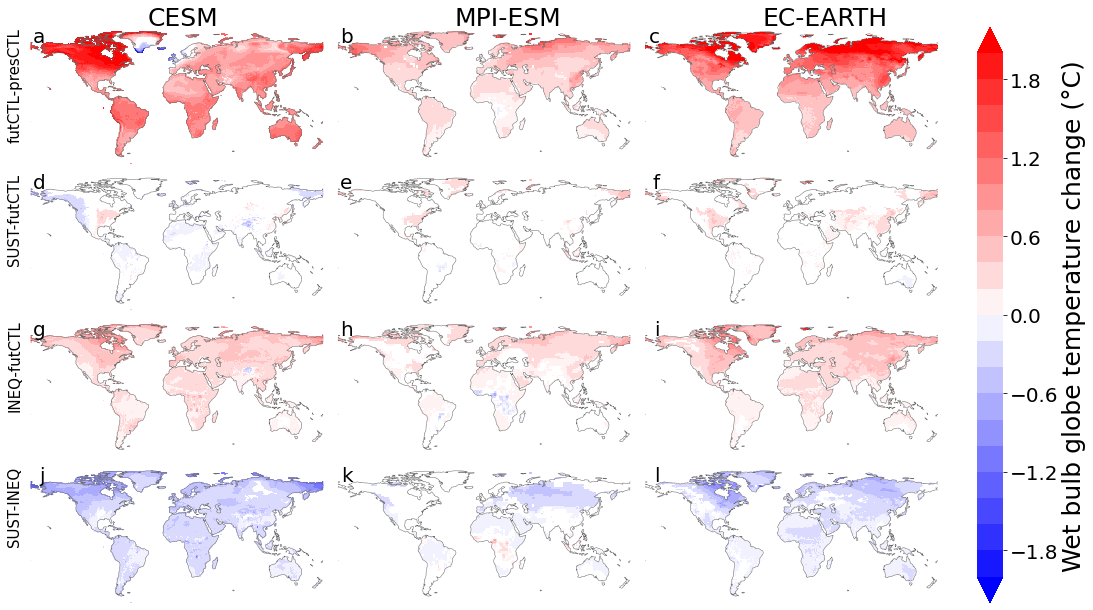

In [7]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Wet bulb globe temperature change (°C)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='wbgt'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='wbgt'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='wbgt'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==3:
            change='SUST-INEQ'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask2=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask2=da_mask2.mean('time')
        elif esm=='mpiesm':
            da_mask2['lat']=da_delta.lat
            da_mask2['lon']=da_delta.lon
        da_delta=da_delta.where(da_mask2)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


# seasonal

<Figure size 1296x720 with 0 Axes>

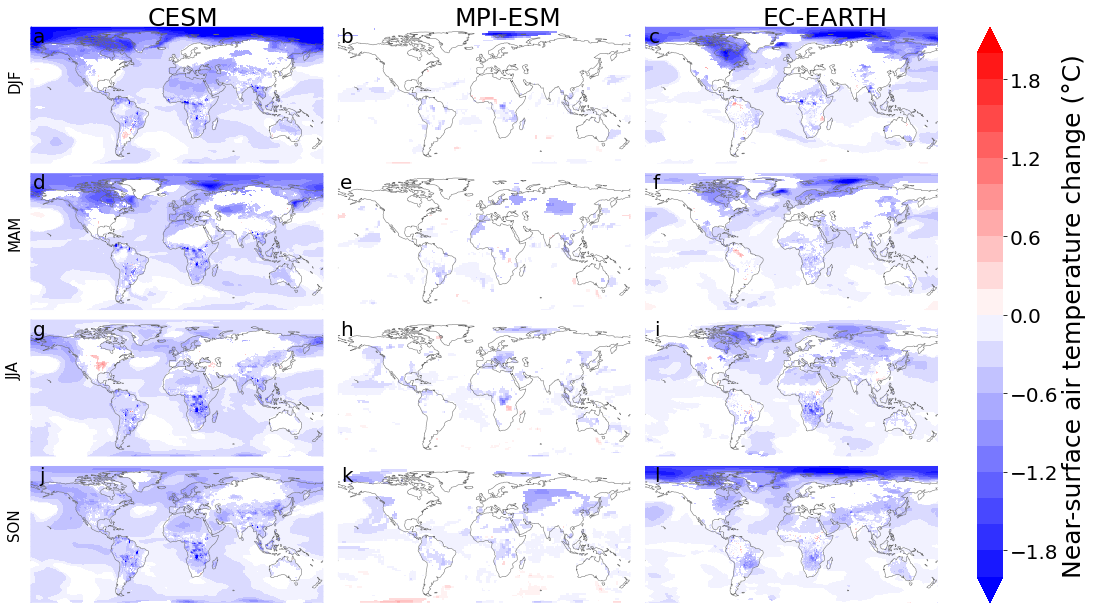

In [2]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface air temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='TREFHT'
var_others='tas'
title = 'Near surface air temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 

plt.savefig('tas_seas_sust_ineq.png')


In [14]:
da_delta_ens_all = open_da_delta('TREFHT', 'futsust', 'futineq', esm='cesm', stream='h0', model='cam', mode='all')
da=da_delta_ens_all.groupby("time.season")['JJA'].mean(['time','ens_member'])

# Flatten the DataArray to 1D
flattened_da = da.values.flatten()

# Find the indices of the 10 largest values
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices
lat_indices, lon_indices = np.unravel_index(largest_indices, da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = da['lat'].values[lat_indices]
longitudes = da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")

Value: 0.7556713223457336, Latitude: 38.16753926701571, Longitude: 271.25
Value: 0.7568475604057312, Latitude: 35.340314136125656, Longitude: 263.75
Value: 0.7700050473213196, Latitude: 40.0523560209424, Longitude: 270.0
Value: 0.8006744384765625, Latitude: 39.10994764397907, Longitude: 270.0
Value: 0.924031674861908, Latitude: 39.10994764397907, Longitude: 268.75
Value: 0.966659665107727, Latitude: -12.722513089005233, Longitude: 305.0
Value: 0.9483952522277832, Latitude: 36.282722513089, Longitude: 270.0
Value: 1.1922613382339478, Latitude: -12.722513089005233, Longitude: 302.5
Value: 0.8412181735038757, Latitude: 40.0523560209424, Longitude: 268.75
Value: 0.8419963717460632, Latitude: 38.16753926701571, Longitude: 263.75


In [16]:
da_delta_ens_all = open_da_delta('tas', 'futsust', 'futineq', esm='ecearth', stream='h0', model='cam', mode='all')

# Assuming da_delta_ens_all_ineq is your DataArray
da=da_delta_ens_all.groupby("time.season")['JJA'].mean(['time','ens_member'])

# Flatten the DataArray to 1D
flattened_da = da.values.flatten()

# Find the indices of the 10 largest values
largest_indices = np.argpartition(flattened_da, -10)[-10:]

# Convert the 1D indices back to 2D indices
lat_indices, lon_indices = np.unravel_index(largest_indices, da.shape)

# Extract the values, latitudes, and longitudes
values = flattened_da[largest_indices]
latitudes = da['lat'].values[lat_indices]
longitudes = da['lon'].values[lon_indices]

# Print the results
for i in range(10):
    print(f"Value: {values[i]}, Latitude: {latitudes[i]}, Longitude: {longitudes[i]}")

Value: 1.0913516283035278, Latitude: -72.6312309494589, Longitude: 265.078125
Value: 1.2355839014053345, Latitude: -72.6312309494589, Longitude: 262.265625
Value: 1.2517286539077759, Latitude: -72.6312309494589, Longitude: 261.5625
Value: 1.2562909126281738, Latitude: -72.6312309494589, Longitude: 260.15625
Value: 1.1966025829315186, Latitude: -72.6312309494589, Longitude: 262.96875
Value: 1.1950843334197998, Latitude: -72.6312309494589, Longitude: 259.453125
Value: 1.1576200723648071, Latitude: -72.6312309494589, Longitude: 263.671875
Value: 1.1157368421554565, Latitude: -72.6312309494589, Longitude: 258.75
Value: 1.1227072477340698, Latitude: -72.6312309494589, Longitude: 264.375
Value: 1.2540103197097778, Latitude: -72.6312309494589, Longitude: 260.859375


<Figure size 1296x720 with 0 Axes>

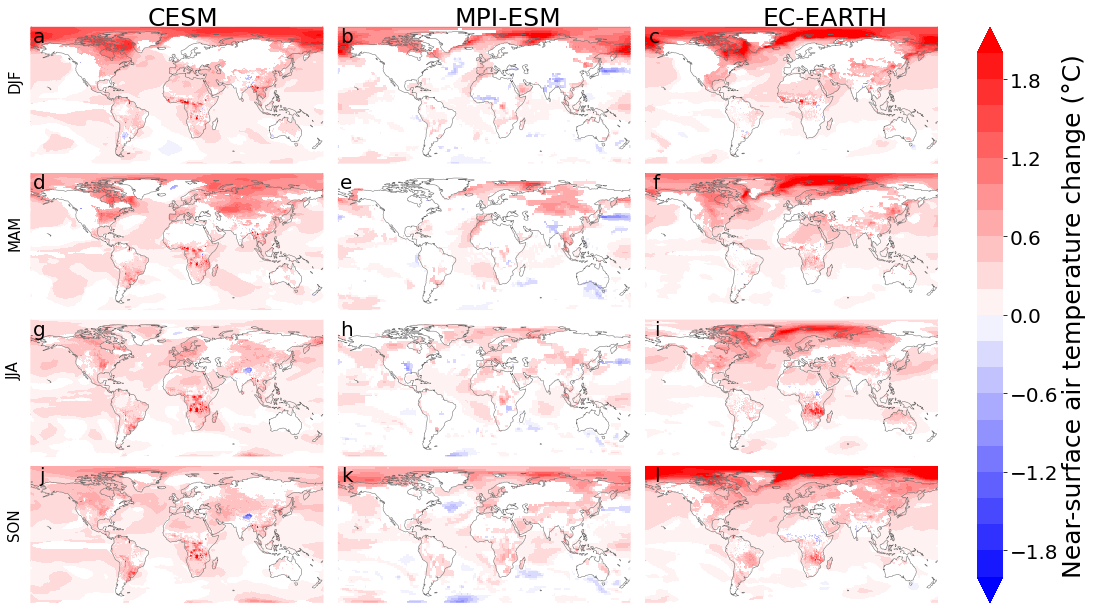

In [6]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface air temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='TREFHT'
var_others='tas'
title = 'Near surface air temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 

plt.savefig('tas_seas_ineq.png')


<Figure size 1296x720 with 0 Axes>

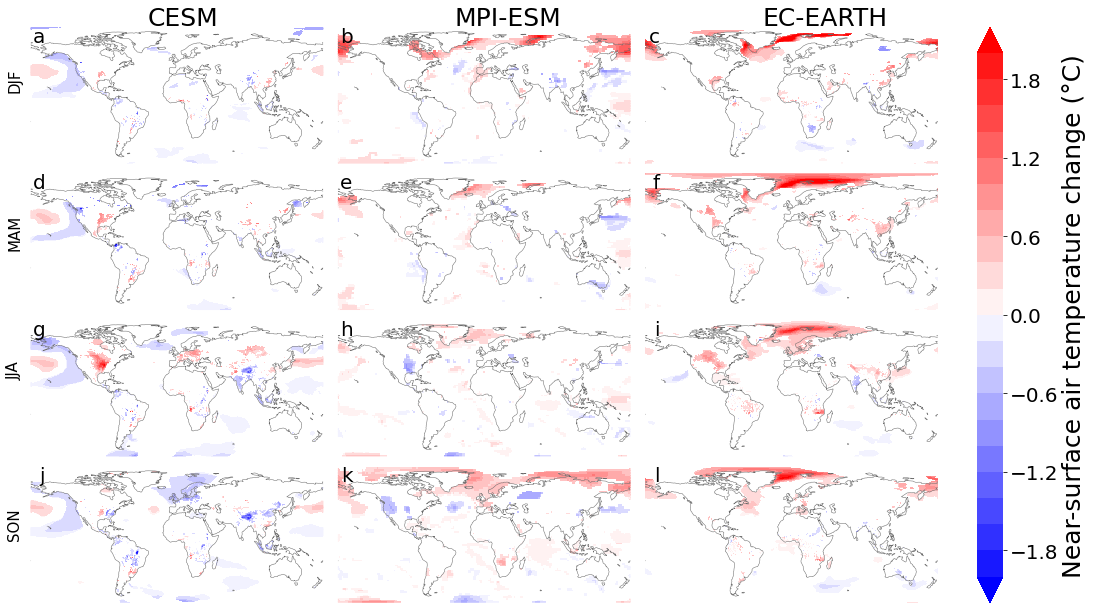

In [17]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface air temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='TREFHT'
var_others='tas'
title = 'Near surface air temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 

plt.savefig('tas_seas_sust.png')


<Figure size 1296x720 with 0 Axes>

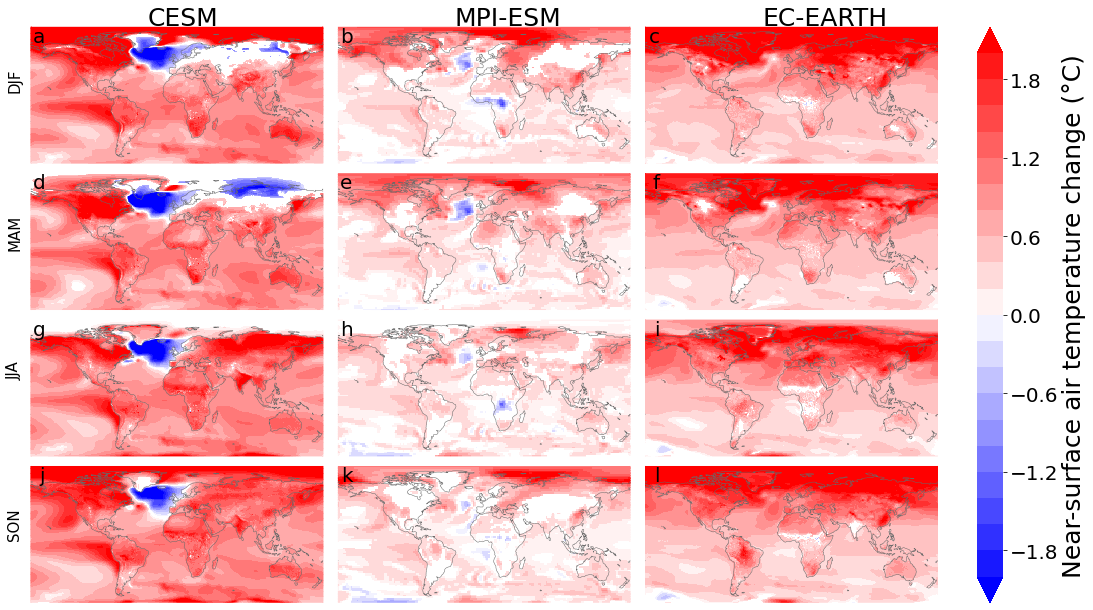

In [18]:

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 

plt.savefig('tas_seas_ssp119.png')

<Figure size 1296x720 with 0 Axes>

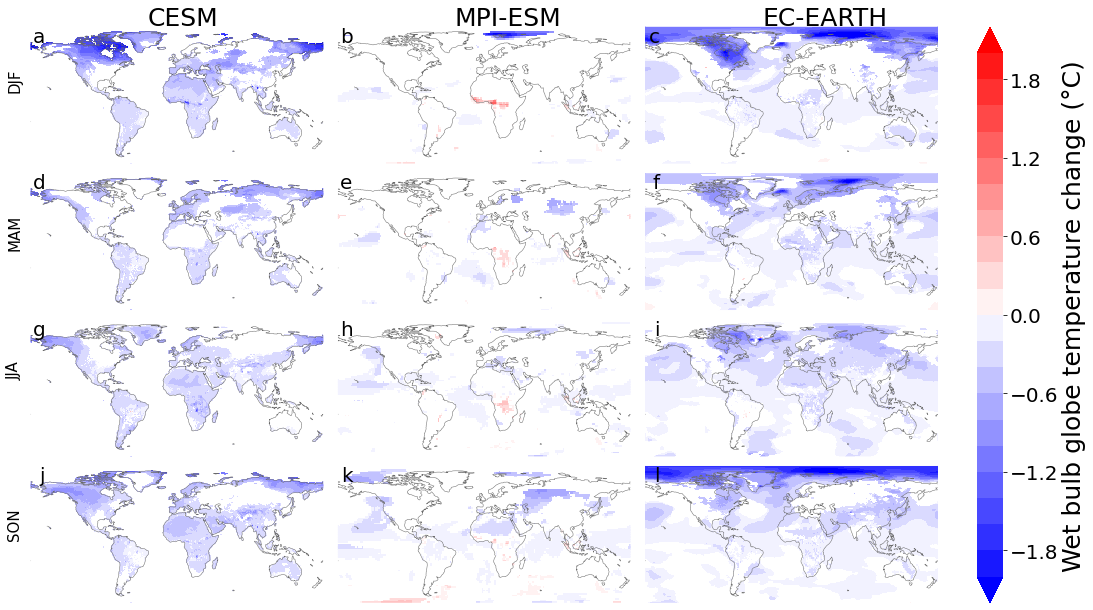

In [2]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Wet bulb globe temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='wbgt'
var_others='wbgt'
title = 'Wet Bulb Globe Temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 



<Figure size 1296x720 with 0 Axes>

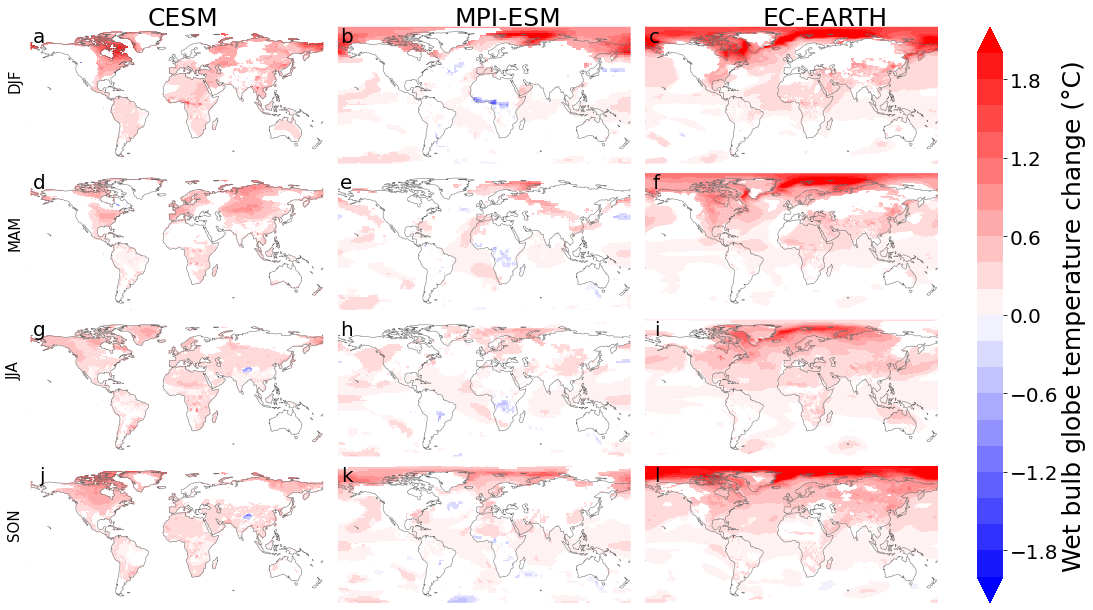

In [3]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Wet bulb globe temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='wbgt'
var_others='wbgt'
title = 'Wet Bulb Globe Temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 



<Figure size 1296x720 with 0 Axes>

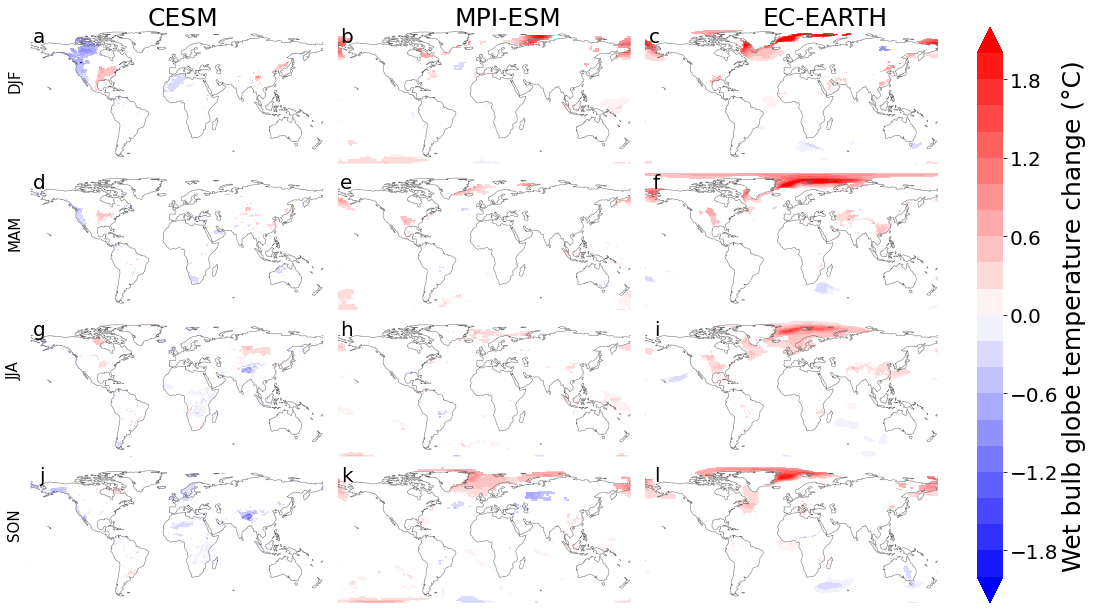

In [4]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Wet bulb globe temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='wbgt'
var_others='wbgt'
title = 'Wet Bulb Globe Temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 



<Figure size 1296x720 with 0 Axes>

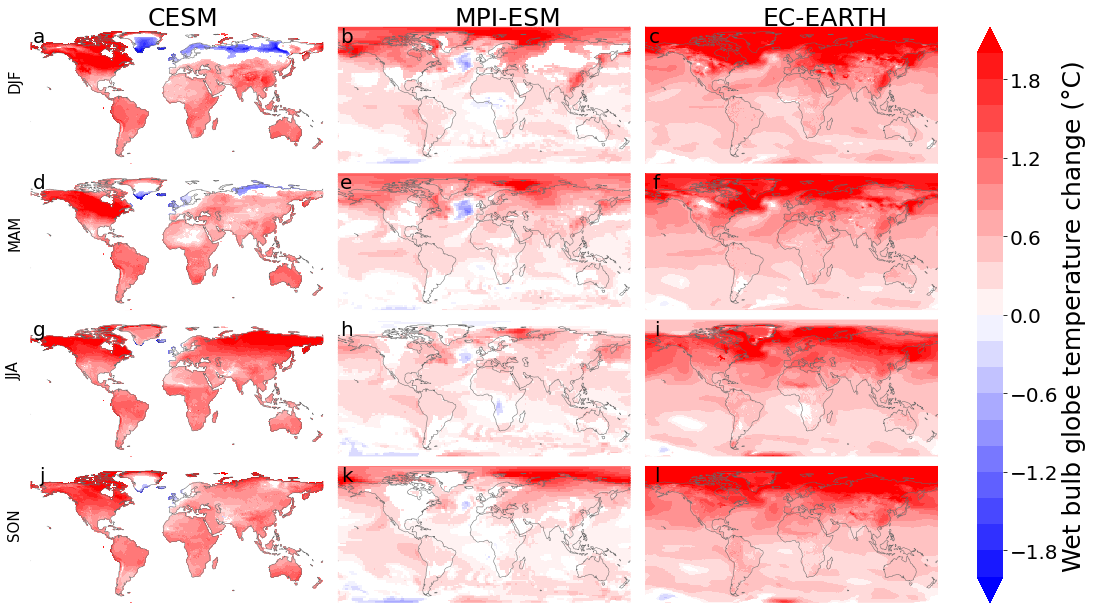

In [7]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Wet bulb globe temperature change (°C)'
mpl.rc('axes',edgecolor='none')
var_CESM='wbgt'
var_others='wbgt'
title = 'Wet Bulb Globe Temperature'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var=var_CESM
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var=var_others
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_DJF,da_delta_MAM,da_delta_JJA,da_delta_SON]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='DJF'
        elif i==1:
            change='MAM'
        elif i==2:
            change='JJA'
        elif i==3:
            change='SON'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        #mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        #mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        #da_mask2=mask_cesm['landmask']
        #if esm=='ecearth':
        #    da_mask2=da_mask2.mean('time')
        #elif esm=='mpiesm':
        #    da_mask2['lat']=da_delta.lat
        #    da_mask2['lon']=da_delta.lon
        #da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,0.7,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 



# Other variables

<Figure size 1296x720 with 0 Axes>

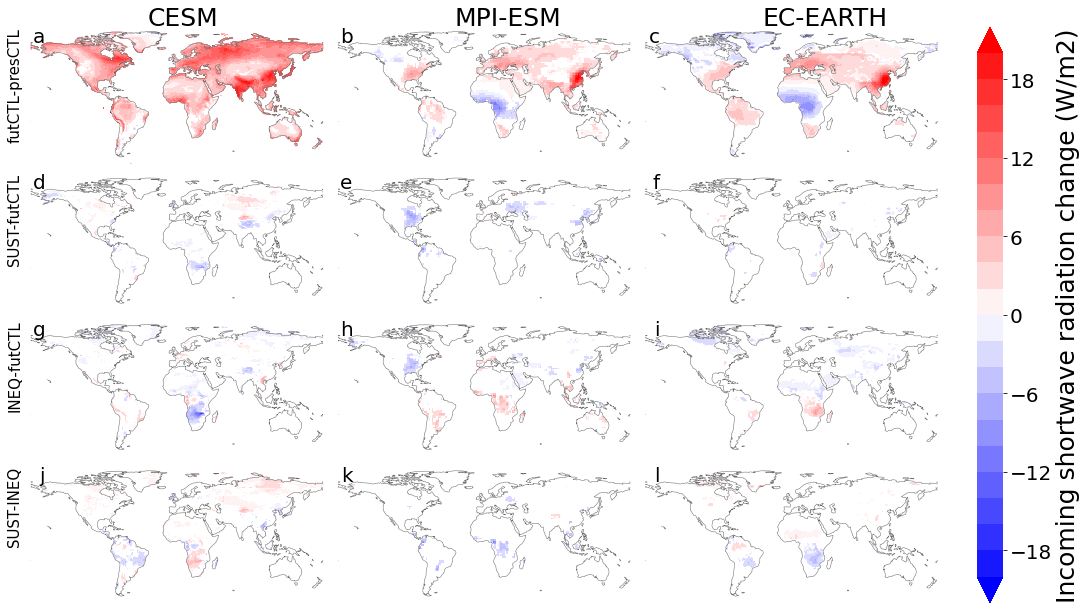

In [8]:

vmin = -20
vmax = 20
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Incoming shortwave radiation change (W/m2)'
mpl.rc('axes',edgecolor='none')

title = 'Incoming solar radiation change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='SWdown'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='rsds'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='rsds'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask2=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask2=da_mask2.mean('time')
        elif esm=='mpiesm':
            da_mask2['lat']=da_delta.lat
            da_mask2['lon']=da_delta.lon
        da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 

plt.savefig('rsds_corr_labels.png')


<Figure size 1296x720 with 0 Axes>

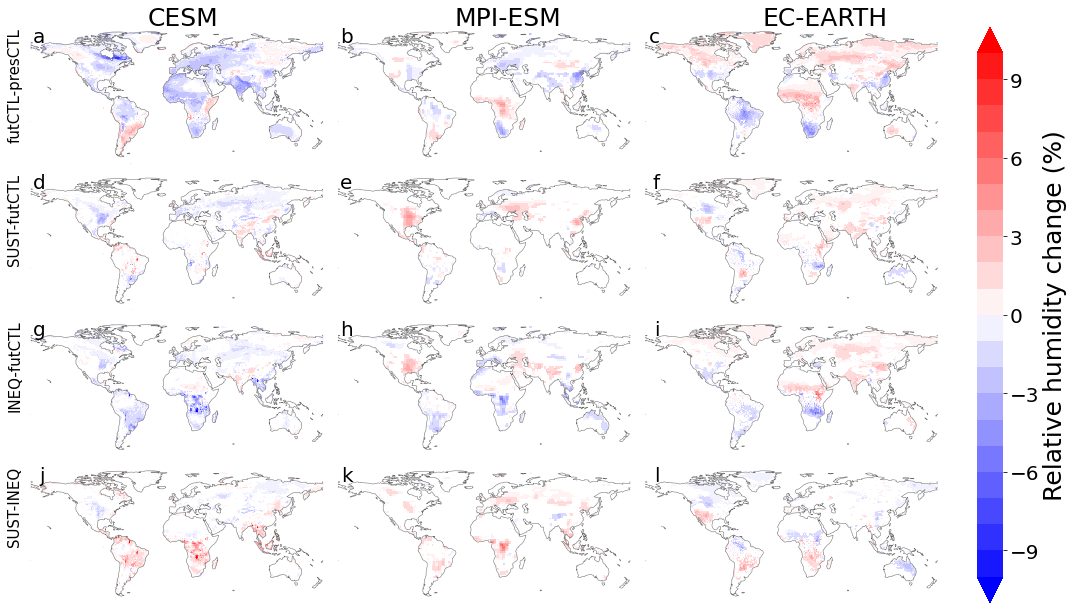

In [9]:

vmin = -10
vmax = 10
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Relative humidity change (%)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface relative humidity change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='RH2M'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='hurs'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl*100,da_delta_ens_all_sust*100,da_delta_ens_all_ineq*100,da_delta_ens_all_lcc*100]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='hurs'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask2=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask2=da_mask2.mean('time')
        elif esm=='mpiesm':
            da_mask2['lat']=da_delta.lat
            da_mask2['lon']=da_delta.lon
        da_delta=da_delta.where(da_mask2)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


plt.savefig('hurs_corr_labels.png')


<Figure size 1296x720 with 0 Axes>

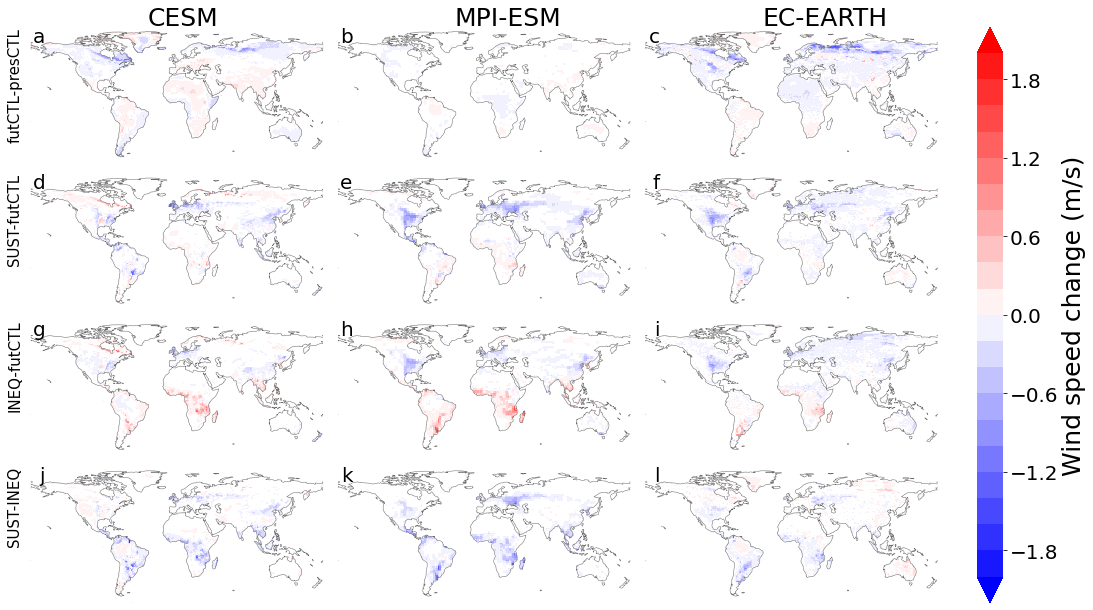

In [10]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Wind speed change (m/s)'
mpl.rc('axes',edgecolor='none')

title = 'Near surface wind speed'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='WIND'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='sfcWind'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='sfcWind'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==3:
            change='SUST-INEQ'

        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
        mask_cesm=xr.open_dataset(mask_dir+'landmask_'+esm+'.nc')
        da_mask2=mask_cesm['landmask']
        if esm=='ecearth':
            da_mask2=da_mask2.mean('time')
        elif esm=='mpiesm':
            da_mask2['lat']=da_delta.lat
            da_mask2['lon']=da_delta.lon
        da_delta=da_delta.where(da_mask2)

        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 

plt.savefig('wind_corr_labels.png')


# Mid century

futctl
<xarray.DataArray 'TREFHT' (time: 1020, lat: 192, lon: 288)>
[56401920 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) datetime64[ns] 2015-02-01 2015-03-01 ... 2100-01-01
Attributes:
    long_name:     Reference height temperature
    units:         K
    cell_methods:  time: mean
(1020, 192, 288)
<xarray.DataArray 'TREFHT' (time: 1020, lat: 192, lon: 288)>
[56401920 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) datetime64[ns] 2015-02-01 2015-03-01 ... 2100-01-01
Attributes:
    long_name:     Reference height temperature
    units:         K
    cell_methods:  time: mean
(1020, 192, 288)
<xarray.DataArray 'TREFHT' (time: 1020, lat: 192, lon: 

futctl
<xarray.DataArray 'TREFHT' (time: 1020, lat: 192, lon: 288)>
[56401920 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) datetime64[ns] 2015-02-01 2015-03-01 ... 2100-01-01
Attributes:
    long_name:     Reference height temperature
    units:         K
    cell_methods:  time: mean
(1020, 192, 288)
<xarray.DataArray 'TREFHT' (time: 1020, lat: 192, lon: 288)>
[56401920 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) datetime64[ns] 2015-02-01 2015-03-01 ... 2100-01-01
Attributes:
    long_name:     Reference height temperature
    units:         K
    cell_methods:  time: mean
(1020, 192, 288)
<xarray.DataArray 'TREFHT' (time: 1020, lat: 192, lon: 

<xarray.DataArray 'tas' (time: 420, lat: 96, lon: 192)>
[7741440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2014-12-31
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48
<xarray.DataArray 'time' (time: 240)>
array(['1995-01-31T00:00:00.000000000', '1995-02-28T00:00:00.000000000',
       '1995-03-31T00:00:00.000000000', ..., '2014-10-31T00:00:00.000000000',
       '2014-11-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1995-01-31 1995-02-28 ... 2014-12-31
<xarray.DataArray 'time' (time: 240)>
array(['2040-01-31T00:00:00.000000000', '2040-02-29T00:00:00.000000000',
       '2040-03-31T00:00:00.000000000', ..., '2059-10-31T00:00:00.000000000',
       '2059-11-30T00:00:

futctl
<xarray.DataArray 'tas' (time: 1020, lat: 96, lon: 192)>
[18800640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2099-12-31
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48
<xarray.DataArray 'tas' (time: 1020, lat: 96, lon: 192)>
[18800640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2099-12-31
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48
<xarray.DataArray 'tas' (time: 1020, lat: 96, lon: 192)>
[18800640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2099-

<xarray.DataArray 'tas' (time: 1020, lat: 256, lon: 512)>
[133693440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T10:30:00 ... 2099-12-16T10:30:00
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  128
    cell_methods:      area: mean time: point
    comment:           near-surface (usually, 2 meter) air temperature
    cell_measures:     area: areacella
    history:           2023-07-07T11:13:05Z altered by CMOR: Treated scalar d...
futineq
<xarray.DataArray 'tas' (time: 1020, lat: 256, lon: 512)>
[133693440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T10:30:00 ... 2099-12-16T10:30:00
  * lon     

<xarray.DataArray 'tas' (time: 1020, lat: 256, lon: 512)>
[133693440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T10:30:00 ... 2099-12-16T10:30:00
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  128
    cell_methods:      area: mean time: point
    comment:           near-surface (usually, 2 meter) air temperature
    cell_measures:     area: areacella
    history:           2023-07-06T21:44:38Z altered by CMOR: Treated scalar d...
<xarray.DataArray 'time' (time: 240)>
array(['2040-01-16T10:30:00.000000000', '2040-02-15T10:30:00.000000000',
       '2040-03-16T10:30:00.000000000', ..., '2059-10-16T10:30:00.000000000',
       '2059-11-15T

<Figure size 1296x720 with 0 Axes>

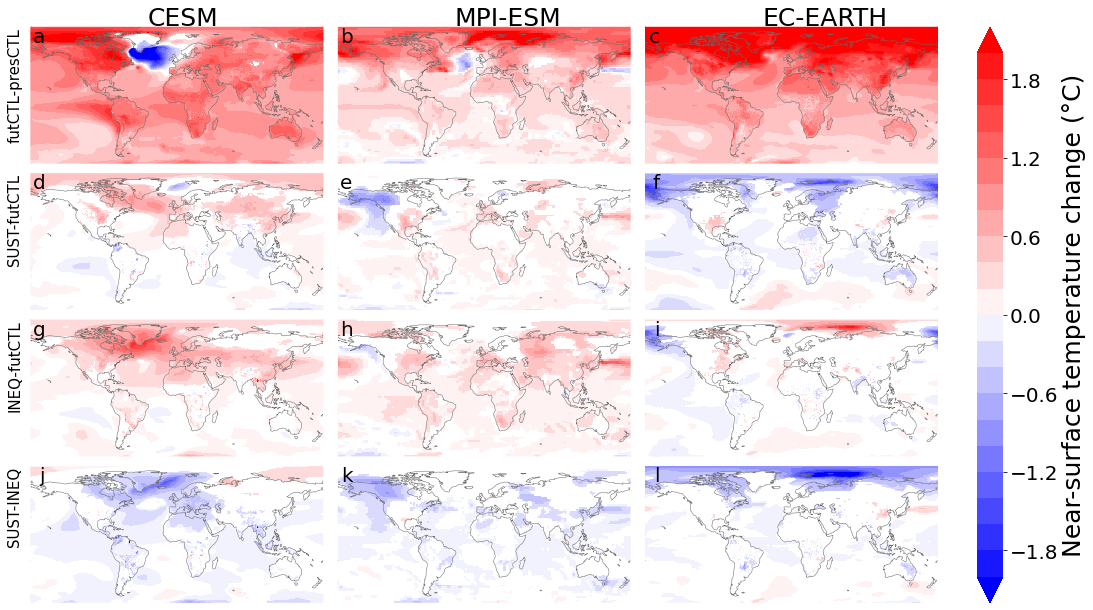

In [11]:
from func_sdh_oe_midc import *

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface temperature change (°C)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['a','d','g','j']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['b','e','h','k']
    elif esm=='ecearth':
        var='tas'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_ineq = open_da_delta(var, 'futineq', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_sust,da_delta_ens_all_ineq,da_delta_ens_all_lcc]
        pan_list=['c','f','i','l']
    for da in da_list:
        
        if i==0:
            change='futCTL-presCTL'
        elif i==2:
            change='INEQ-futCTL'
        elif i==1:
            change='SUST-futCTL'
        elif i==3:
            change='SUST-INEQ'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta=da_delta.where(da_mask)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        #ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')
        
        if i==1:
            if esm=="mpiesm":
                esmname="MPI-ESM"
            elif esm=="ecearth":
                esmname="EC-EARTH"
            else:
                esmname=esm.upper()
            ax_2=ax
            ax.text(0.4,1.15,esmname,rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.05, 1., pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
        if k==1:
            ax.text(-0.08,1,change,rotation='vertical', transform=ax.transAxes,fontsize=15, va='top', ha='left') 
#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


# other variables

# Plots of all relevant variables for WBGT in all ESMs

<Figure size 1296x720 with 0 Axes>

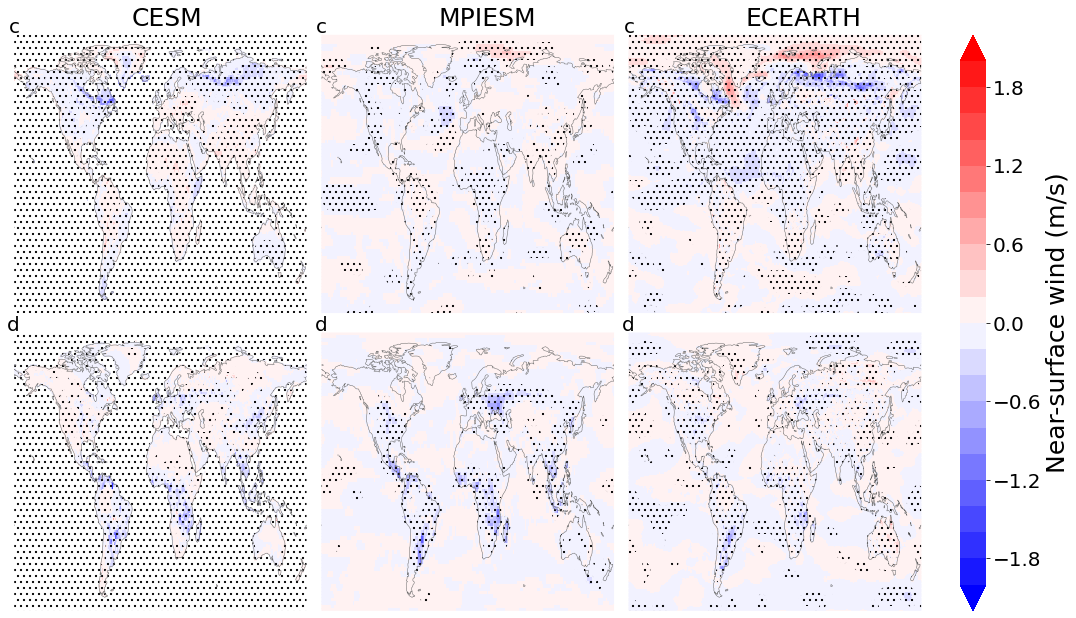

In [4]:

vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface wind (m/s)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface wind change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='WIND'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        #da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta=da_delta_ens_all.mean(['time','ens_member'])
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_lcc]
        pan_list=['c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='sfcWind'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta=da_delta_ens_all.mean(['time','ens_member'])
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_lcc]
        pan_list=['c','d']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<Figure size 1296x720 with 0 Axes>

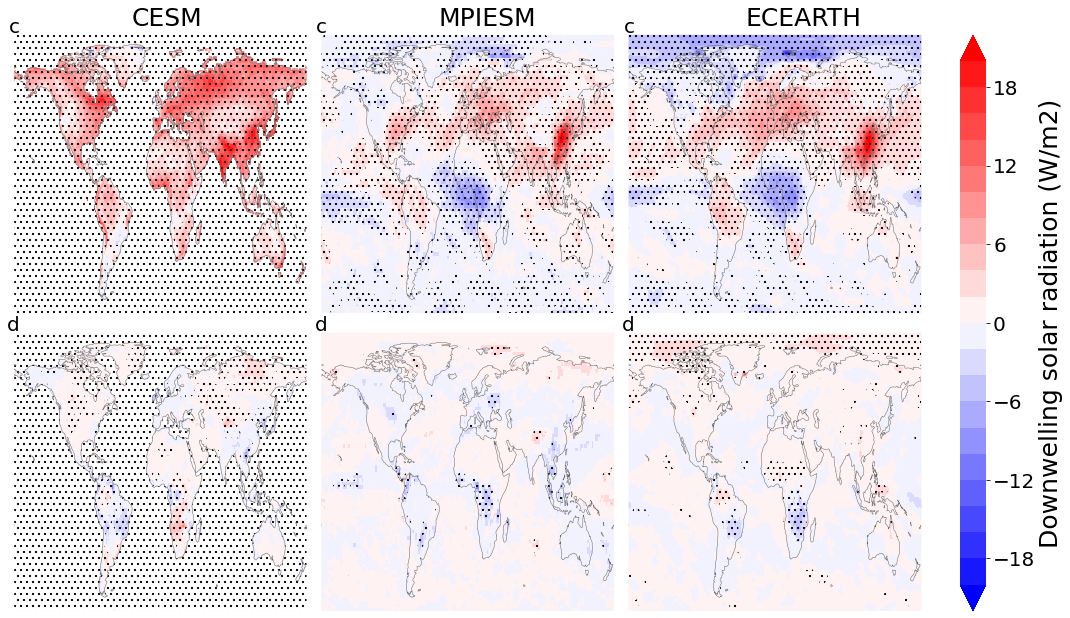

In [2]:

vmin = -20
vmax = 20
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Downwelling solar radiation (W/m2)'
mpl.rc('axes',edgecolor='none')

title = 'Downwelling solar radiation change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='SWdown'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        #da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta=da_delta_ens_all.mean(['time','ens_member'])
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_lcc]
        pan_list=['c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='rsds'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta=da_delta_ens_all.mean(['time','ens_member'])
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_lcc]
        pan_list=['c','d']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left') 
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<xarray.DataArray 'PS' (lat: 192, lon: 288)>
array([[144.85359 , 144.85359 , 144.85359 , ..., 144.85359 , 144.85359 ,
        144.85359 ],
       [140.2865  , 140.323   , 140.37372 , ..., 140.18486 , 140.21489 ,
        140.25237 ],
       [137.22673 , 137.32736 , 137.43433 , ..., 136.95738 , 137.04044 ,
        137.13115 ],
       ...,
       [ 99.370255,  99.34277 ,  99.3146  , ...,  99.38248 ,  99.38807 ,
         99.385284],
       [ 93.76323 ,  93.75983 ,  93.7542  , ...,  93.75582 ,  93.76091 ,
         93.76397 ],
       [ 88.24955 ,  88.24955 ,  88.24955 , ...,  88.24955 ,  88.24955 ,
         88.24955 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
<xarray.DataArray 'PS' (lat: 192, lon: 288)>
array([[ -8.474767 ,  -8.474767 ,  -8.474767 , ...,  -8.474767 ,
         -8.474767 ,  -8.474767 ],
       [ -8.333783 ,  -8.358476 ,  -8.385918 , 

<Figure size 1296x720 with 0 Axes>

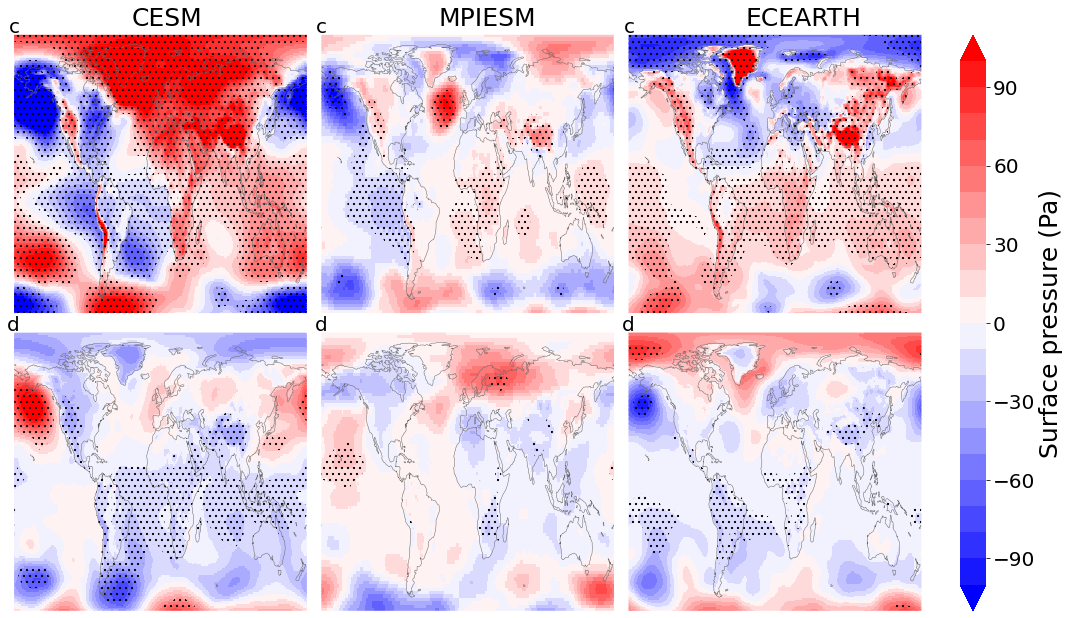

In [3]:

vmin = -100
vmax = 100
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Surface pressure (Pa)'
mpl.rc('axes',edgecolor='none')

title = 'Surface pressure change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='PS'
        stream='h0'
        isxtrm=False
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta=da_delta_ens_all.mean(['time','ens_member'])
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_lcc]
        pan_list=['c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='ps'
        stream='h0'
        da_delta_ens_all_ctl = open_da_delta(var, 'futctl', 'hist', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_ens_all_lcc = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta_ens_all_sust = open_da_delta(var, 'futsust', 'futctl', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        #da_delta=da_delta_ens_all.mean(['time','ens_member'])
        da_list=[da_delta_ens_all_ctl,da_delta_ens_all_lcc]
        pan_list=['c','d']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        da_delta=da.mean(['time','ens_member'])
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        #da_delta=da_delta.where(da_mask)
        print(da_delta)
        h=da_delta.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask
        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left')  
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


# Seasonal plots of all relevant variables for WBGT in all ESMs

<Figure size 1296x720 with 0 Axes>

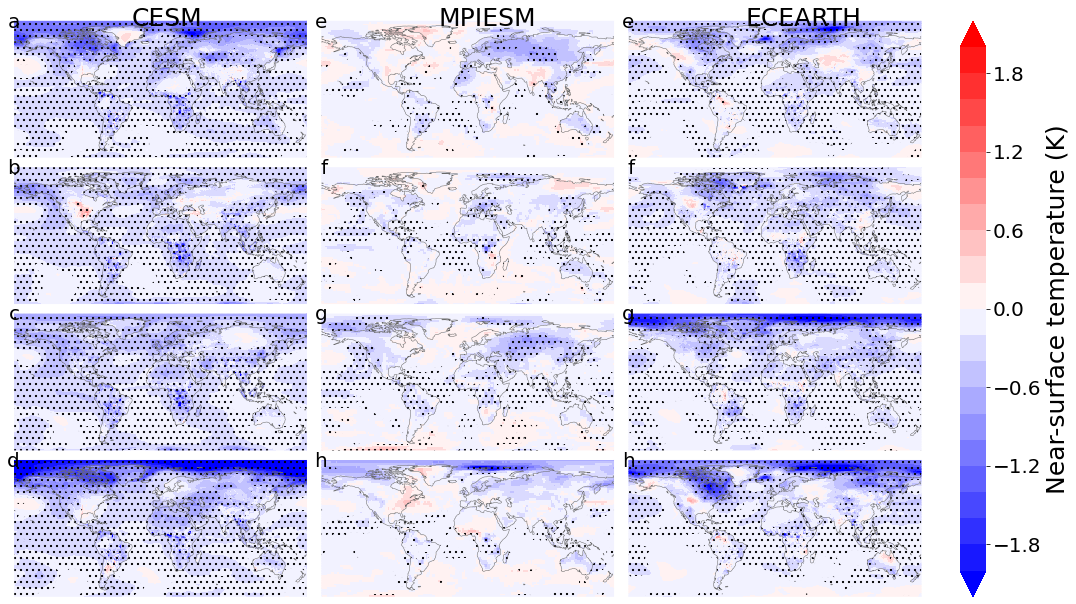

In [5]:
vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface temperature (K)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface temperature change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='TREFHT'
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['a','b','c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='tas'
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['e','f','g','h']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta_mean=da.mean(['time','ens_member'])
        h=da_delta_mean.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask

        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left')   
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<Figure size 1296x720 with 0 Axes>

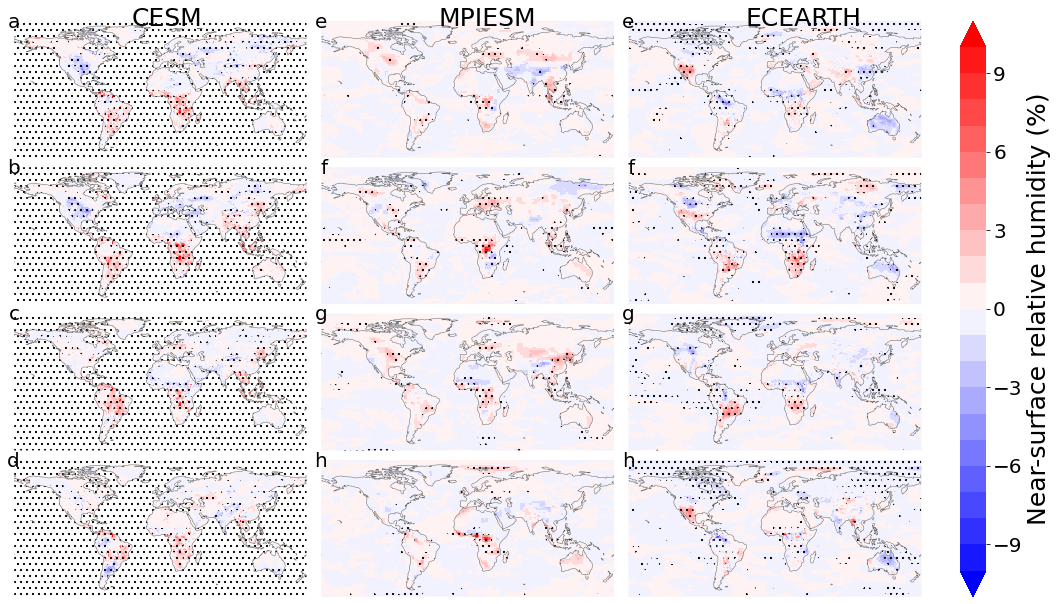

In [13]:
vmin = -10
vmax = 10
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface relative humidity (%)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface humidity change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='RH2M'
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['a','b','c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    elif esm=='mpiesm':
        var='hurs'
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM*100,da_delta_JJA*100,da_delta_SON*100,da_delta_DJF*100]
        pan_list=['e','f','g','h']
    elif esm=='ecearth':
        var='hurs'
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['e','f','g','h']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta_mean=da.mean(['time','ens_member'])
        h=da_delta_mean.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask

        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left')   
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<Figure size 1296x720 with 0 Axes>

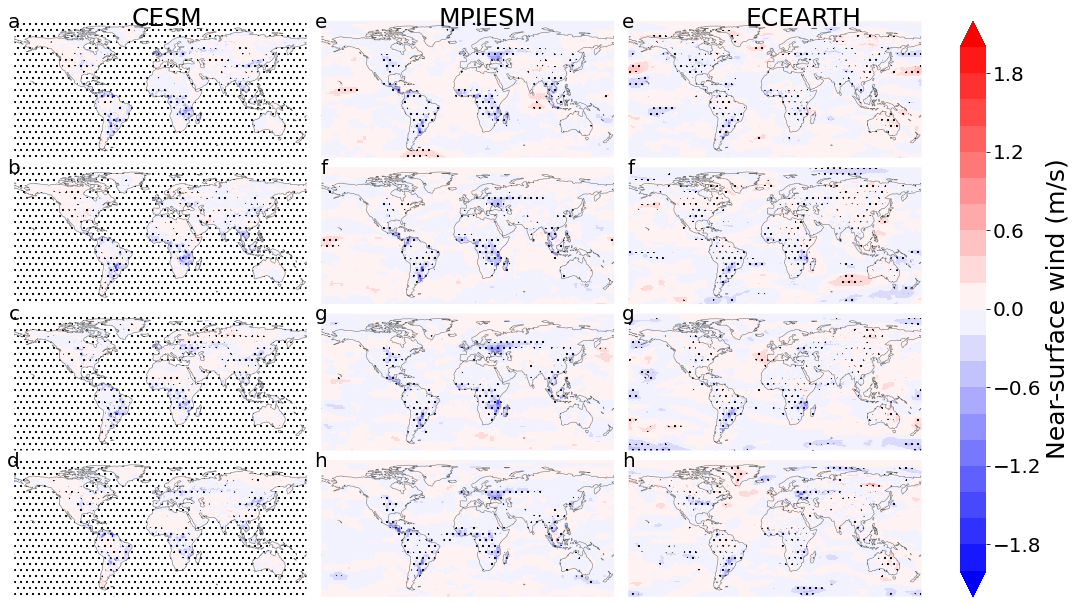

In [10]:
vmin = -2
vmax = 2
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Near-surface wind (m/s)'
mpl.rc('axes',edgecolor='none')

title = 'Near-surface wind change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='WIND'
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['a','b','c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='sfcWind'
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['e','f','g','h']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta_mean=da.mean(['time','ens_member'])
        h=da_delta_mean.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask

        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left')   
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


<Figure size 1296x720 with 0 Axes>

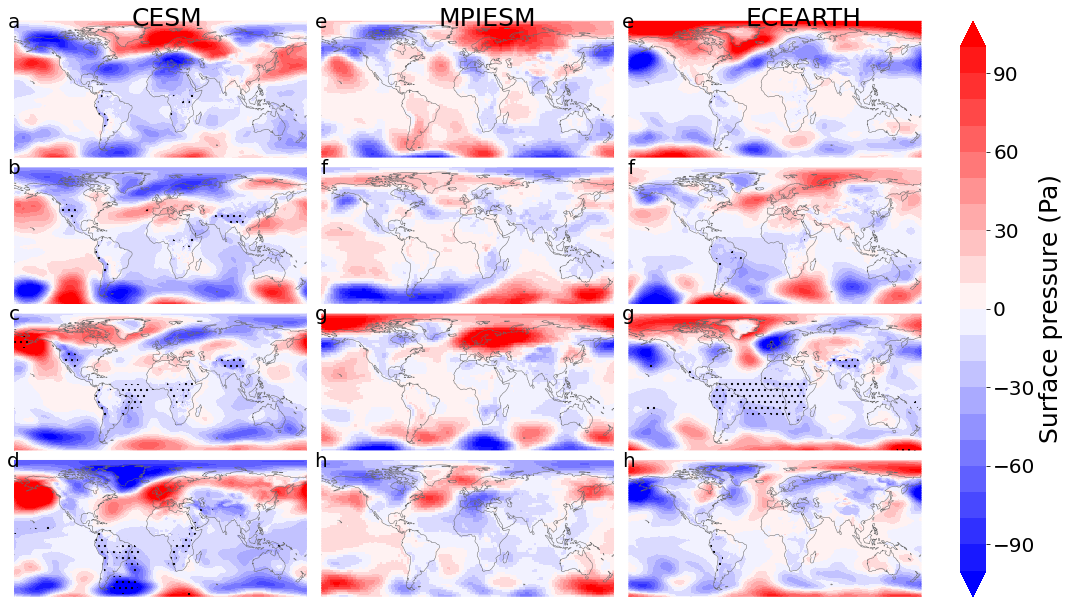

In [14]:
vmin = -100
vmax = 100
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Surface pressure (Pa)'
mpl.rc('axes',edgecolor='none')

title = 'Surface pressure change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='PS'
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['a','b','c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='ps'
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['e','f','g','h']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta_mean=da.mean(['time','ens_member'])
        h=da_delta_mean.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask

        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left')   
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 


/readonly/dodrio/apps/RHEL8/zen2-ib/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/readonly/dodrio/apps/RHEL8/zen2-ib/software/SciPy-bundle/2021.10-foss-2021b/lib/python3.9/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


<Figure size 1296x720 with 0 Axes>

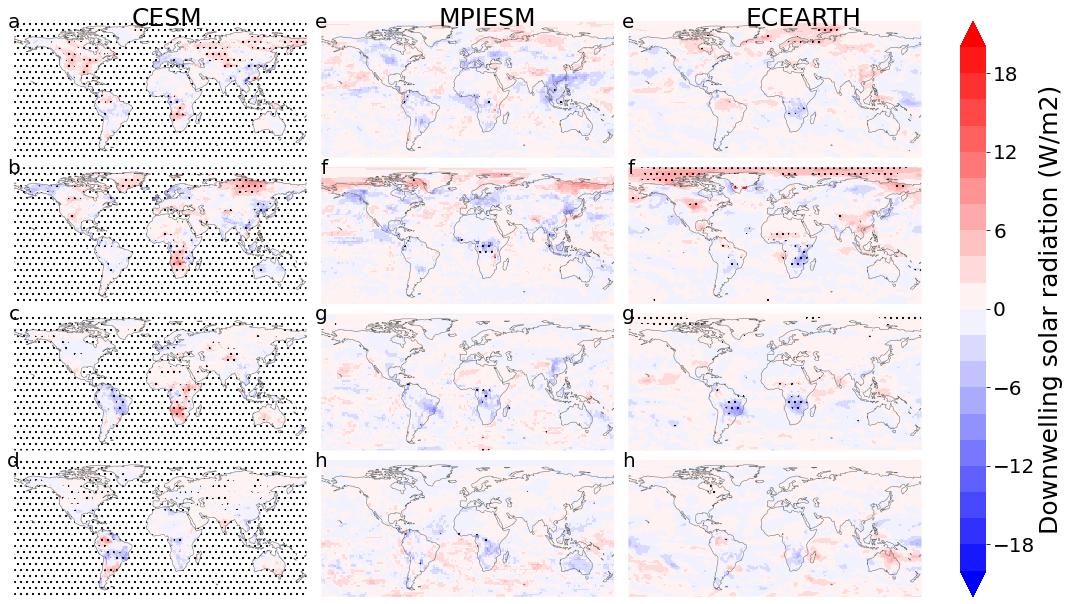

In [15]:
vmin = -20
vmax = 20
nsteps = 20
alpha=0.05
# define colorbar levels
levels = np.arange(vmin, vmax+0.2, (vmax-vmin)/nsteps)
cmap = 'bwr'
# define colorbar label (including unit!)
cbar_label = 'Downwelling solar radiation (W/m2)'
mpl.rc('axes',edgecolor='none')

title = 'Downwelling solar radiation change'

k=0
fig = plt.figure()
fig, axes = plt.subplots(nrows=4, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()})
for esm in ['cesm','mpiesm','ecearth']:
    i=0
    k=k+1
    if esm=='cesm':
        var='SWdown'
        stream='h0'
        isxtrm=False
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='clm2', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['a','b','c','d']
    #elif model =='ecearth':
     #   da_list=[PT_def_ec_rel,PT_for_ec_rel]
     #   pan_list=['g','h']
    else:
        var='rsds'
        stream='h0'
        da_delta_ens_all = open_da_delta(var, 'futsust', 'futineq', esm=esm, stream=stream, model='cam', mode='all',isxtrm=isxtrm)
        da_delta_JJA=da_delta_ens_all.groupby("time.season")['JJA']
        da_delta_DJF=da_delta_ens_all.groupby("time.season")['DJF']
        da_delta_MAM=da_delta_ens_all.groupby("time.season")['MAM']
        da_delta_SON=da_delta_ens_all.groupby("time.season")['SON']
        da_list=[da_delta_MAM,da_delta_JJA,da_delta_SON,da_delta_DJF]
        pan_list=['e','f','g','h']
    for da in da_list:
        
        if i==0:
            change='futctl-histctl'
        elif i==1:
            change='futineq-futctl'
        elif i==2:
            change='futsust-futctl'
        i=i+1
        ax = axes[i-1,k-1]
        #da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)  #boolean mask
        da_delta_mean=da.mean(['time','ens_member'])
        h=da_delta_mean.plot(ax=ax, cmap=cmap,vmin=vmin,vmax=vmax,levels=levels, extend='both', add_colorbar=False, add_labels=False,label=model)
        ax.set_aspect('auto')

        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        #ax.text(-20, -10, "futctl-histctl", rotation=90, fontsize=20)
        #ax.set_ylabel('')
        # set the title and coastlines
        #ax.set_title(title, loc='right', fontsize=20)
        ax.coastlines(color='dimgray', linewidth=0.5)
        da_mask=get_statsign_fieldsign_mask(da,isxtrm=isxtrm)#boolean mask

        ax.contourf(da_mask.lon, da_mask.lat, da_mask, levels = [0, alpha, 1], hatches=['','..'], colors='none')

        if i==1:
            ax_2=ax
            ax.text(0.4,1.10,esm.upper(),rotation='horizontal', transform=ax.transAxes,fontsize=25, va='top', ha='left')   
        ax.set_title('')
        if esm=='cesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
         #   if k==1:
          #      ax.text(0.75, 1.10, change, transform=ax.transAxes,fontsize=25, va='top', ha='right')
        elif esm=='mpiesm':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')
            ax_old_mpi=ax
        elif esm=='ecearth':
            ax.text(0.02, 1.06, pan_list[i-1], transform=ax.transAxes,fontsize=20, va='top', ha='right')

#cb = plt.colorbar(im,fraction= 0.02, pad= 0.04, extend='both')
#cb.set_label(label = cbar_label, size=10)
#cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.05, hspace=0.07)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(h, cax=cb_ax)
# set the colorbar ticks and tick labels
#cbar.set_ticks(np.arange(0, 1.1, 0.5))
#cbar.set_ticklabels(['low', 'medium', 'high']
cbar.set_label(label=cbar_label, size=25)
cbar.ax.tick_params(labelsize=20) 
